# Animal_10_Classification
#### link git:https://github.com/Debobrata-Chakraborty-Kakon/Image-Classification-Inception-V3-Animal-10-Dataset-
#### link dataset: https://www.kaggle.com/alessiocorrado99/animals10

In [1]:
#!pip install tensorflow-gpu

In [2]:
# import  libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 # inception v3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import load_model

import numpy as np
from glob import glob

In [3]:
# ukuran dari semua image yang nanti akan diresize
IMAGE_SIZE = [224, 224]

train_path = './raw-img'
test_path = './test-set'

In [4]:
# Import the Inception library ,adding preprocessing layer to the front of Inception
# using imagenet weights
                                    #  [224,244,3]
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# not to train existing weights
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('./raw-img/*')

In [7]:
folders

['./raw-img\\cane',
 './raw-img\\cavallo',
 './raw-img\\elefante',
 './raw-img\\farfalla',
 './raw-img\\gallina',
 './raw-img\\gatto',
 './raw-img\\mucca',
 './raw-img\\pecora',
 './raw-img\\ragno',
 './raw-img\\scoiattolo']

In [8]:
labels=["dog","horse",  "elephant",  "butterfly", "chicken", "cat", "cow",  "sheep","spider" ,"squirrel"]

# Model

In [9]:
#  layers
x = Flatten()(inception.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# this is the model we will train
model = Model(inputs=inception.input, outputs=prediction)

In [11]:

# structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:

#  cost and optimization method
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image data preprocessing

---



In [13]:
#  Image Data Generator 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,   #  0-255 color , R= 166 /255 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
#memisahkan data test menjadi 32 batch
training_set = train_datagen.flow_from_directory('./raw-img',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 25679 images belonging to 10 classes.


In [15]:
#memisahkan data test menjadi 32 batch
test_set = test_datagen.flow_from_directory('./test-set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 10 classes.


## **Train**

---



In [16]:
# fit the model
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.1):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[callbacks]
)

Epoch 1/5
803/803 [==============================] - 1316s 2s/step - loss: 1.7614 - accuracy: 0.8837 - val_loss: 1.7979 - val_accuracy: 0.9300
Epoch 2/5
803/803 [==============================] - 673s 838ms/step - loss: 1.5029 - accuracy: 0.9440 - val_loss: 1.7206 - val_accuracy: 0.9520
Epoch 3/5
803/803 [==============================] - 678s 844ms/step - loss: 1.4286 - accuracy: 0.9537 - val_loss: 2.3882 - val_accuracy: 0.9420
Epoch 4/5
803/803 [==============================] - 677s 843ms/step - loss: 1.2736 - accuracy: 0.9594 - val_loss: 2.3179 - val_accuracy: 0.9580
Epoch 5/5
803/803 [==============================] - 695s 865ms/step - loss: 1.2859 - accuracy: 0.9601 - val_loss: 2.2156 - val_accuracy: 0.9400


In [17]:
model.save('Animal10Classification.h5')

In [18]:
model = load_model('Animal10Classification.h5')

# Check its architecture
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [19]:
import matplotlib.pyplot as plt

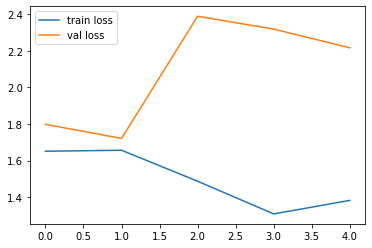

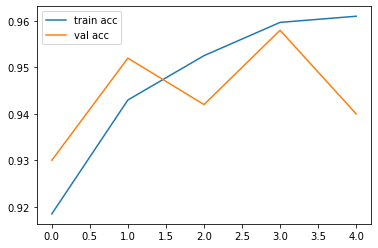

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()


# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


**Predict**

---



In [22]:
y_pred = model.predict(test_set)

y_pred

array([[3.1009932e-28, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        2.0761649e-37, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.1441326e-31,
        1.9639959e-28, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [23]:
y_pred.shape

(500, 10)

In [24]:
def plot_value_array( predictions_array, true_label):
  
  plt.grid(False)
  plt.xticks(range(10),true_label)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')

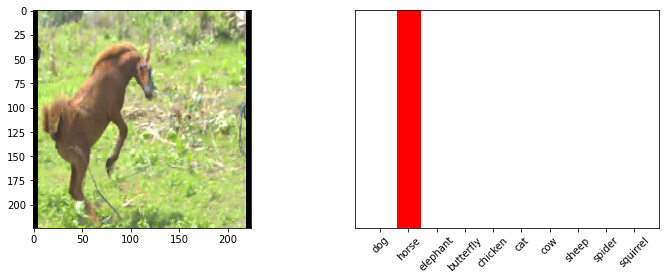

In [25]:
plt.figure(figsize=(12,4))

img_path = 'kuda.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)

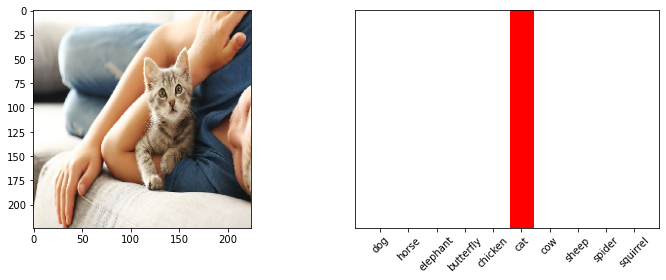

In [26]:
plt.figure(figsize=(12,4))

img_path = 'kucing.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

#img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)

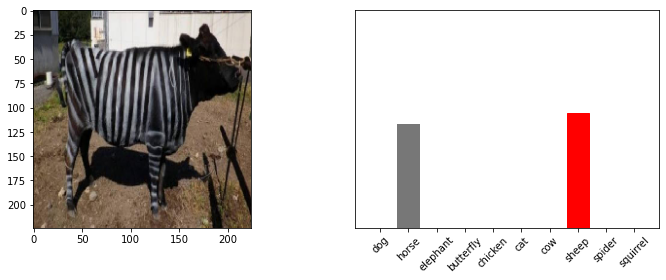

In [27]:
plt.figure(figsize=(12,4))

img_path = 'sapi1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)

array([0.0000000e+00, 5.3842285e-20, 0.0000000e+00, 0.0000000e+00,
       9.9974936e-01, 0.0000000e+00, 2.5058302e-04, 1.1560202e-21,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

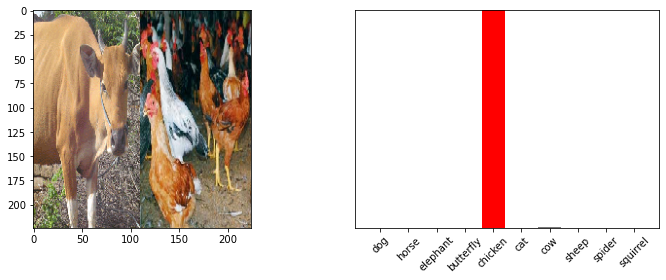

In [28]:
plt.figure(figsize=(12,4))

img_path = 'ayamSapi.png'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
plt.subplot(1,2,1)
plt.imshow(img)

plt.subplot(1,2,2)
plot_value_array( my_prediction[0], labels)
_ = plt.xticks(range(10), labels, rotation=45)
my_prediction[0]

In [29]:
plt.figure(figsize=(12,4))

img_path = 'naga.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_data = preprocess_input(img_data)

img_data.shape
my_prediction=model.predict(img_data)
# plt.subplot(1,2,1)
# plt.imshow(img)

# plt.subplot(1,2,2)
# plot_value_array( my_prediction[0], labels)
# _ = plt.xticks(range(10), labels, rotation=45)
my_prediction[0]

array([4.5789871e-04, 3.2144843e-08, 2.5263404e-32, 5.4091217e-16,
       1.4232264e-18, 8.7074970e-15, 1.3885953e-30, 2.5745235e-35,
       9.9954212e-01, 1.5127694e-19], dtype=float32)

<Figure size 864x288 with 0 Axes>